# Continuous models with Logic Approximations

We'll assume that when the transcription factor, $X$, is above a threshold, $K$, then a given gene $Y$, regulated only $X$, is transcribed at a rate, $\beta$.  When $X$ is below the threshold, $K$, gene $Y$ is not be transcribed.  To represent this situation,  we can rewrite the formula for $Y$ as:

$$
\text{transcription of Y} = f(X) = \beta\ \Theta(X > K)
$$

where the function $\Theta$ is zero if the statement inside the parentheses is false or one if the statement is true. An alternate way to write this is:
$$
f(X) = 
\begin{cases}
    0,      &\text{if $X > K$;} \\
    \beta,  &\text{otherwise.}
\end{cases}
$$


When $X$ is a repressor we can write:

$$
f(X) = \beta\ \Theta(X < K)
$$

If $Y$ was regulated by two transcription factors, $X_1$ and $X_2$, and both TFs had to be above their respect thresholds for $Y$ to be transcribed, we can represent the rate of transcription of $Y$ as:

$$
f(X_1, X_2) = \beta \theta (X_1 > K_1 \land X_2 > K_2)
$$

# Modeling changes in transcript concentration over time

The above function tells us about how the transcription rate of $Y$ changes as a function of its transcriptional regulator, $X$, but it does not tell us how the amount of $Y$ in the system changes over time. How the the amount of $Y$ transcript changes over time is a function of two things: 1) a growth term which represents the rate at which the gene is being transcribed; and 2) a decay term which gives the rate at which transcripts are being degraded.  We can write down a simple differential equation for this as follows:

$$
\frac{dY}{dt} =  f(X_1, X_2, \ldots) - \alpha Y
$$

The $f(X_1, X_2, \ldots)$ term represents the growth term and is a function of the transcription factors that regulate $Y$. The term, $\alpha Y$ represents the rate at which $Y$ is being broken down or diluted.  Notice that the decay rate is a proportional to the amount of $Y$ that is present.

As before, in the case where $Y$ is regulated by a single input we might use $f(X) = \beta \theta(X > K_1)$.  For the equivalent function where $Y$ was regulated by two transcription factor, $X_1$ and $X_2$ we could use the function $f(X_1, X_2) = \beta \theta (X_1 > K_1 \land X_2 > K_2)$.

In [14]:
import numpy as np
from matplotlib import pyplot as plt

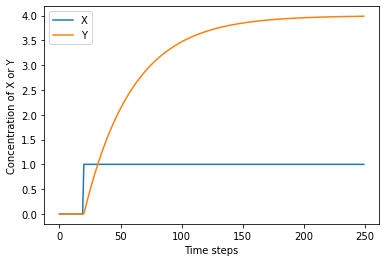

In [18]:
def dydt(X, Y, Kx, B, a):
    return B*(X > Kx) - a*Y

B = 0.1
a = 0.025
Kx = 0.5

nsteps = 250
X = [0]*20 + [1]*(nsteps - 20)
Y = [0]

for i in range(1, nsteps):
    ynow = Y[-1]
    xnow = X[i-1]
    ynew = ynow + dydt(xnow, ynow, Kx, B, a)
    Y.append(ynew)

plt.plot(X, label="X")
plt.plot(Y, label="Y")
plt.xlabel("Time steps")
plt.ylabel("Concentration of X or Y")
plt.legend()
pass

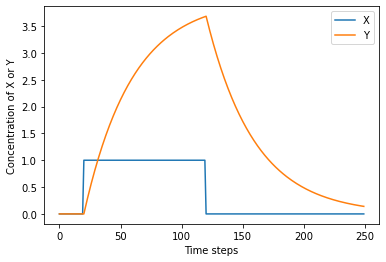

In [20]:
B = 0.1
a = 0.025
Kx = 0.5

nsteps = 250

X = [0]*20 + [1]*100 + [0]*130
Y = [0]

for i in range(1, nsteps):
    ynow = Y[-1]
    xnow = X[i-1]
    ynew = ynow + dydt(xnow, ynow, Kx, B, a)
    Y.append(ynew)

plt.plot(X, label="X")
plt.plot(Y, label="Y")
plt.xlabel("Time steps")
plt.ylabel("Concentration of X or Y")
plt.legend()
pass

# Feed Forward Loops

We're now going to use some of these tools to look at a class of network motifs, called Feed Forward Loops (FFLs), found in signaling and regulatory networks. FFLs involve interactions between three components, with the basic topology illustrated below. Depending on the signs of the edges (whether activating or repressing) we can classify FFLs as "coherent" or "incoherent." We'll take a look at an example of each class.

## A Coherent FFL

The most common type of coherent FFL is illustrated in the figure below.  In this system $X$ is an activator of $Y$ and both $X$ and $Y$ regulate the production of $Z$ with AND logic (i.e. both $X$ and $Y$ must be above particular thresholds in order to trigger the production of $Z$). 

![coherent ffl](http://people.duke.edu/~pm21/coherent-ffl.png)


Using our logic approximation framework we will model the coherent FFL network illustrated above as follows.

#### Gene Y:

\begin{aligned}
Y = f(X) = \beta_y\ \Theta(X > K_{xy})
\\
\\
\frac{dY}{dt} = \beta_y\ \Theta(X > K_{xy}) - \alpha_{y}Y
\end{aligned}    
    
    
    
#### Gene Z:

\begin{aligned}
Z = g(X,Y) = \beta_z\ \Theta(X > K_{xz})\Theta(Y > K_{yz})
\\
\\
\frac{dZ}{dt} = \beta_z\ \Theta(X > K_{xz})\Theta(Y > K_{yz}) - \alpha_{z}Z
\end{aligned}  

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
## We'll specify the behavior of X as a series of pulse of different length
## so we'll define a function to generate pulses

def pulse(ontime, offtime,  ntimes, onval=1):
    if ontime >= offtime:
        raise Exception("Invalid on/off times.")
    signal = np.zeros(ntimes)
    signal[ontime:offtime] = onval
    return signal


(0.0, 1.5)

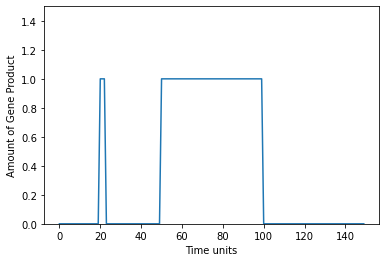

In [4]:
nsteps = 150
short_pulse = pulse(20, 23, nsteps)  # 5 sec pulse
long_pulse = pulse(50, 100, nsteps)  # 50 sec pulse
X = short_pulse + long_pulse

plt.plot(X)
plt.xlabel('Time units')
plt.ylabel('Amount of Gene Product')
plt.ylim(0, 1.5)


In [6]:
## Write Python functions for dY/dt and dZ/dt

def dY(B,K,a,X,Y):
    return B*(X > K) - a * Y
    pass # define the function here


def dZ(B,Kx,Ky,a,X,Y,Z):
    return B*(X > Kx)*(Y > Ky) - a*Z
    pass # define the function here


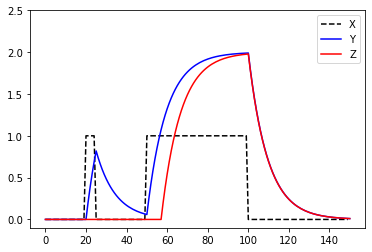

In [7]:
## Plot X, Y, and Z on the same time scale

nsteps = 150
short_pulse = pulse(20, 25, nsteps)  # 5 sec pulse
long_pulse = pulse(50, 100, nsteps)  # 50 sec pulse
X = short_pulse + long_pulse

# setup parameters for Y and Z
Y = [0]
betay, alphay = 0.2, 0.1
Kxy = 0.5

Z = [0]
betaz, alphaz = 0.2, 0.1
Kxz = 0.5
Kyz = 1

for i in range(nsteps):
    xnow = X[i]
    ynow, znow = Y[-1], Z[-1]
    
    ynew = ynow + dY(betay, Kxy, alphay, xnow, ynow)
    znew = znow + dZ(betaz, Kxz, Kyz, alphaz, xnow, ynow, znow)
    
    Y.append(ynew)
    Z.append(znew)
    

plt.plot(X, 'k--', label='X', linewidth=1.5)
plt.plot(Y, 'b', label='Y')
plt.plot(Z, 'r', label='Z')
plt.ylim(-0.1, 2.5)
plt.legend()
pass

### Performance of the Coherent FFL under noisy inputs

Let's further explore the behavior of the coherent FFL defined given noisy inputs.  As before we're going to define an input signal, $X$, that has a short and long pulse, but now we're going to pollute $X$ with random noise.

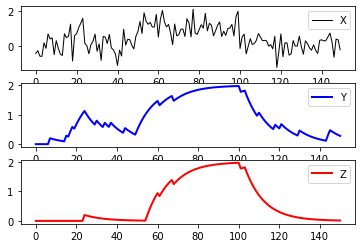

In [21]:
nsteps = 150
short_pulse = pulse(20, 25, nsteps)  # 5 sec pulse
long_pulse = pulse(50, 100, nsteps)  # 50 sec pulse
X = short_pulse + long_pulse 
noise = np.random.normal(0, 0.5, nsteps) # mean=0, sd=0.2
X = X + noise

# setup parameters for Y and Z
Y = [0]
betay, alphay = 0.2, 0.1
Kxy = 0.5

Z = [0]
betaz, alphaz = 0.2, 0.1
Kxz = 0.5
Kyz = 1

for i in range(nsteps):
    xnow = X[i]
    ynow, znow = Y[-1], Z[-1]
    
    ynew = ynow + dY(betay, Kxy, alphay, xnow, ynow)
    znew = znow + dZ(betaz, Kxz, Kyz, alphaz, xnow, ynow, znow)
    
    Y.append(ynew)
    Z.append(znew)

# draw each trace as a subfigure
# subfigures stacked in a vertical grid

plt.subplot2grid((3,1),(0,0))
plt.plot(X, 'k', label='X', linewidth=1)
plt.legend()

plt.subplot2grid((3,1),(1,0))
plt.plot(Y, 'b', label='Y', linewidth=2)
plt.legend()

plt.subplot2grid((3,1),(2,0))
plt.plot(Z, 'r', label='Z', linewidth=2)
plt.legend()
pass

### Type 1 Coherent FFLs can act as a Sign-Sensitive Delays

As discussed in the article by Shen-Orr et al. a feed forward loop of the type we've just discussed can act as a type of filter -- a sign-sensitive delay that keeps $Z$ from firing in response to transient noisy signals from $X$, but shuts down $Z$ immediately once the signal from $X$ is removed. 

## An Incoherent FFL

Consider the FFL illustrated in the figure below.  

![incoherent ffl](http://people.duke.edu/~pm21/incoherent-ffl.png)

In this incoherent FFL, the logic function that regulates $Z$ is "X AND NOT Y".  That is $Z$ turns on once $X$ is above a given threshold, but only stays on fully as long as $Y$ is below another threshold. Again for simplicity we assume $K_{xy} = K_{yz}$. 

### Dynamics of Y

As before, the dynamics of $Y$ are described by:

$$
\frac{dY}{dt} = \beta_y\ \Theta(X > K_{xy}) - \alpha_{y}Y
$$




### Dynamics of Z

To describe $Z$ we consider two phases: 1) while $Y < K_{yz}$ and 2) while $Y > K_{yz}$. 

#### Z, Phase 1

For the first phase:

$$
\frac{dZ}{dt} = \beta_z\ \Theta(X > K_{xz}) - \alpha_{z}Z
$$



#### Z, Phase 2

Once the repressor $Y$ reaches it's critical threshold $K_{yz}$ it begins to repress the transcription of $Z$ and $Z$ decays to a new lower steady state. The value of this steady state depends on how leaky the repression of $Z$ is by $Y$.  

$$
\frac{dZ}{dt} = \beta_{z}^{'} \Theta(Y > K_{xyz}) - \alpha_{z}Z
$$


### Combining the two phases of Z

We can combine the two phases of $Z$ into a single function:

$$
f(X,Y) = \beta_z\Theta(X > K_{xz} \land Y < K_{yz}) + \beta_{z}^{'}\Theta(Y \geq K_{yz}) - \alpha_z Z
$$

In [22]:
## Write a Python function that represents dZ/dt for the Incoherent FFL

def dZ_incoh(B1,B2,Kx,Ky,a,X,Y,Z):
    return B1*(X > Kx and Y < Ky) + B2*(Y >= Ky) - a*Z
    pass # define the function here

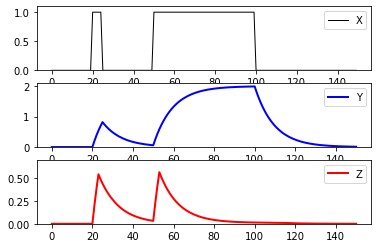

In [23]:
## Write your simulation here

nsteps = 150
short_pulse = pulse(20, 25, nsteps)  # 5 sec pulse
long_pulse = pulse(50, 100, nsteps)  # 50 sec pulse
X = short_pulse + long_pulse

# setup parameters for Y and Z
Y = [0]
betay, alphay = 0.2, 0.1
Kxy = 0.5

Z = [0]
betaz1, betaz2 = 0.2, 0.001
alphaz = 0.1
Kxz = 0.5
Kyz = 0.5

for i in range(nsteps):
    xnow = X[i]
    ynow, znow = Y[-1], Z[-1]
    
    ynew = ynow + dY(betay, Kxy, alphay, xnow, ynow)
    znew = znow + dZ_incoh(betaz1, betaz2, Kxz, Kyz, alphaz, xnow, ynow, znow)
    
    Y.append(ynew)
    Z.append(znew)
    

# draw each trace as a subfigure
# subfigures stacked in a vertical grid

plt.subplot2grid((3,1),(0,0))
plt.plot(X, 'k', label='X', linewidth=1)
plt.legend()
plt.ylim(0,1.1)

plt.subplot2grid((3,1),(1,0))
plt.plot(Y, 'b', label='Y', linewidth=2)
plt.legend()
plt.ylim(0,2.1)

plt.subplot2grid((3,1),(2,0))
plt.plot(Z, 'r', label='Z', linewidth=2)
plt.legend()
plt.ylim(0,0.7)
pass

### Dynamics of the Incoherent FFL

Note that the stimulus amount of $Z$ in the system initially increases, but then decreases to a lower steady even when the initial stimulus persists. This system thus generates **pulse-like dynamics to a persistent signal**. 